In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tanjumdata/tanjum.xlsx


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = '/kaggle/input/tanjumdata/tanjum.xlsx'  
data = pd.read_excel(file_path)

# Filling missing values
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())
data = data.iloc[:-2]
data

,Year,GDP_B,Population_M,Import_Mkwh,Sales_Mkwh,Demand_Mw,Temperature_celcius
0,1971,-5.479483,68376204,0.0,468.0,183.0,24.86
1,1972,-13.973729,69346705,0.0,623.9,222.0,25.38
2,1973,3.325680,71144818,0.0,828.2,250.0,25.45
3,1974,9.591956,72947807,0.0,835.2,266.0,25.17
4,1975,-4.088214,74700345,0.0,932.0,301.0,25.34
5,1976,5.661361,76380080,0.0,1013.0,342.0,25.44
6,1977,2.673056,78137788,0.0,1205.0,396.0,25.18
7,1978,7.073838,80007550,0.0,1381.0,437.0,25.26
8,1979,4.801635,81908151,0.0,1406.0,462.0,26.00
9,1980,0.819142,83929765,0.0,1740.0,545.0,25.60


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


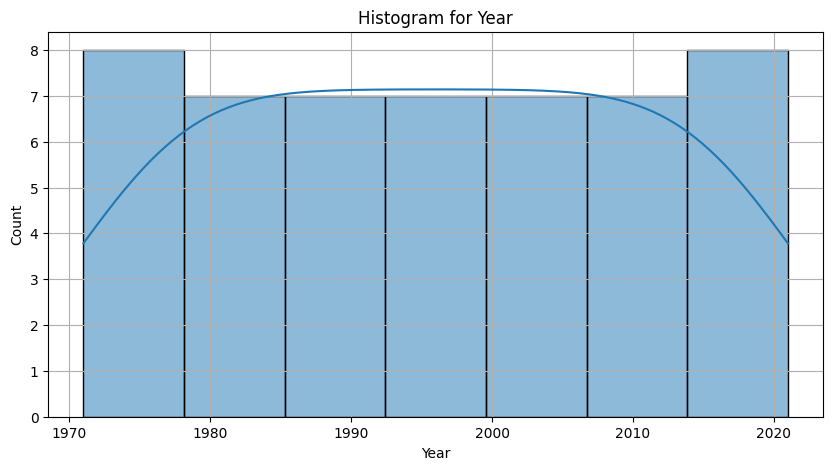

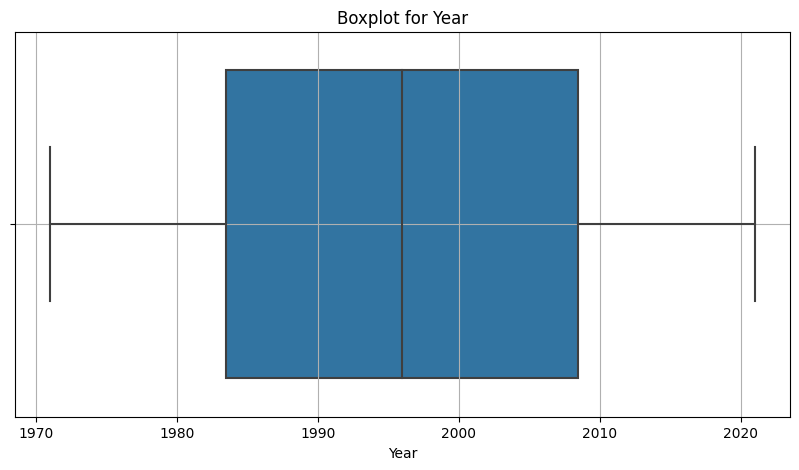

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


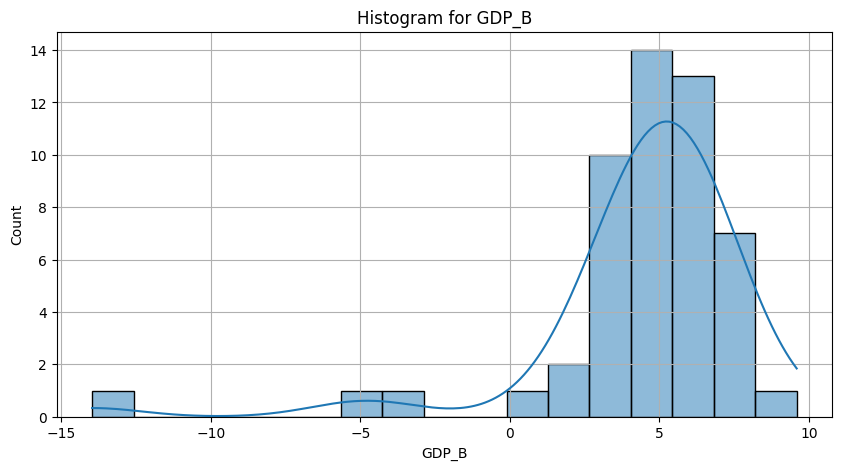

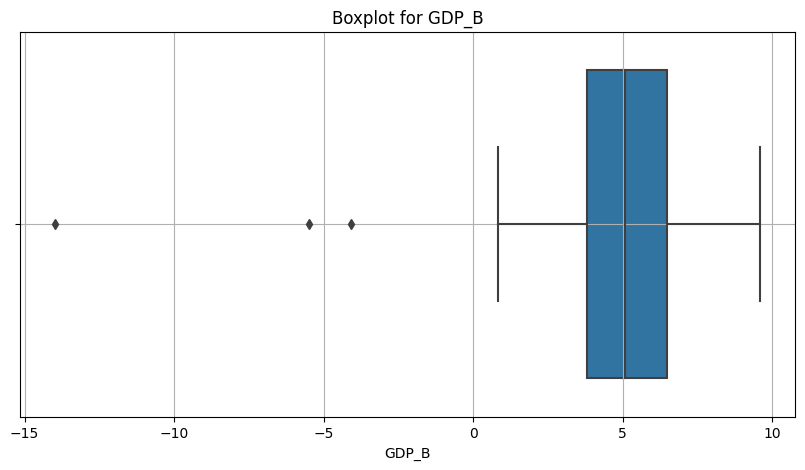

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


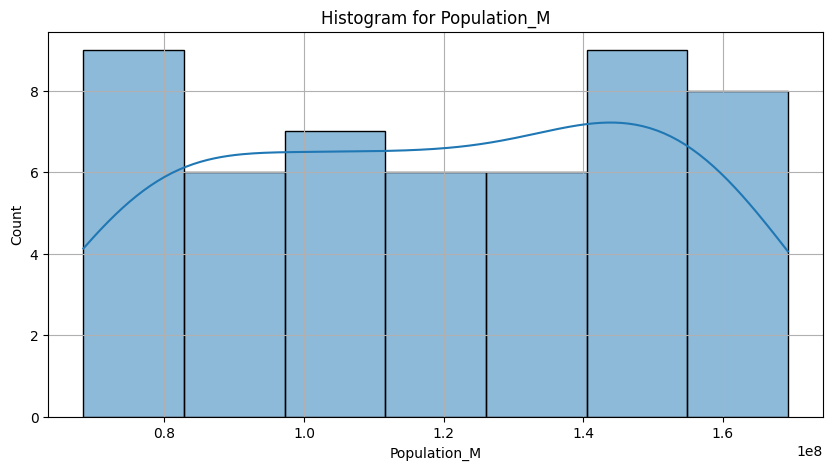

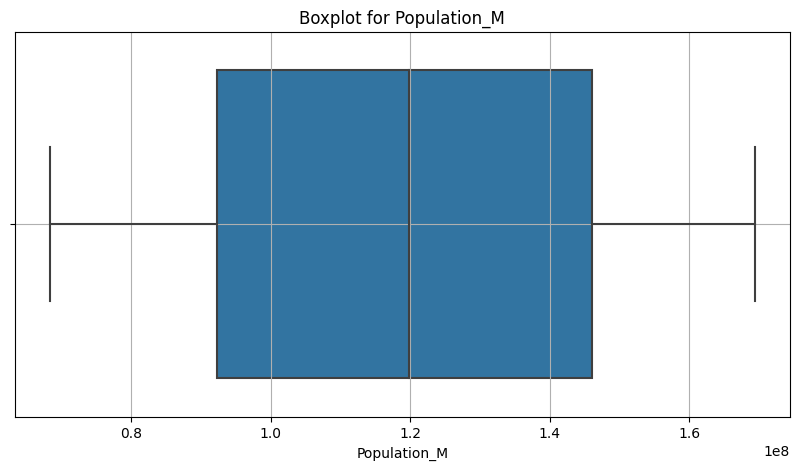

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


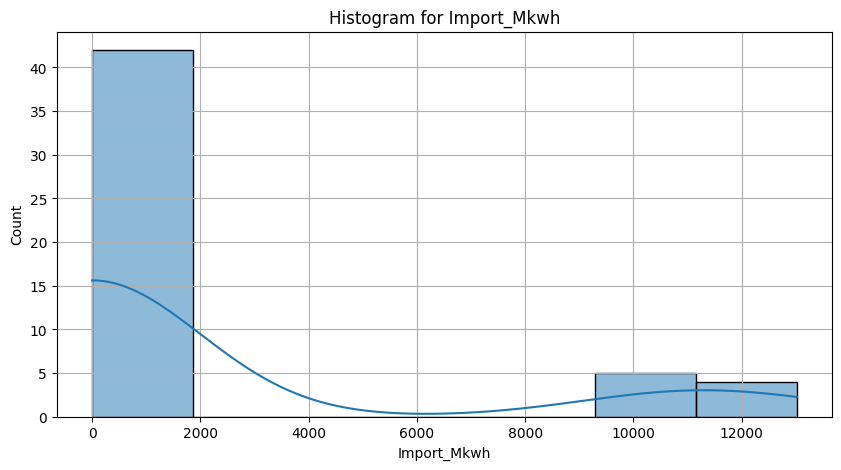

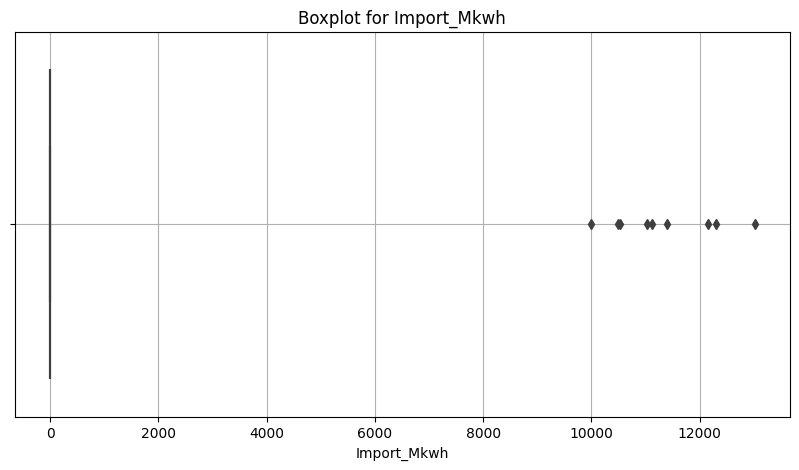

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


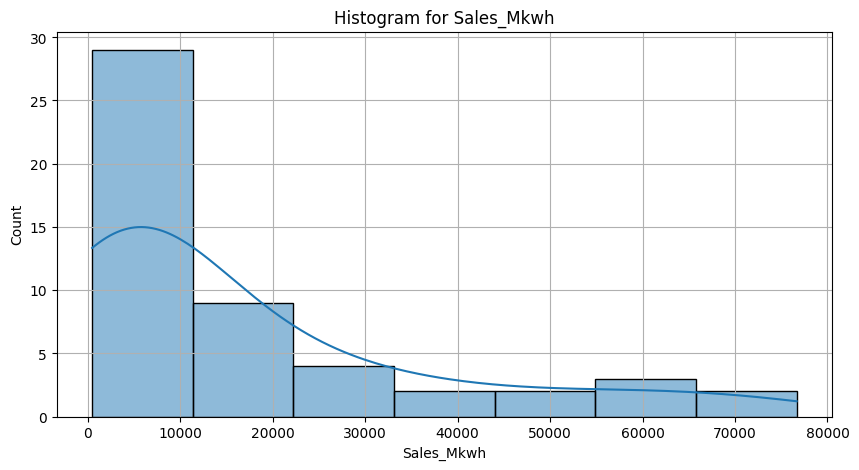

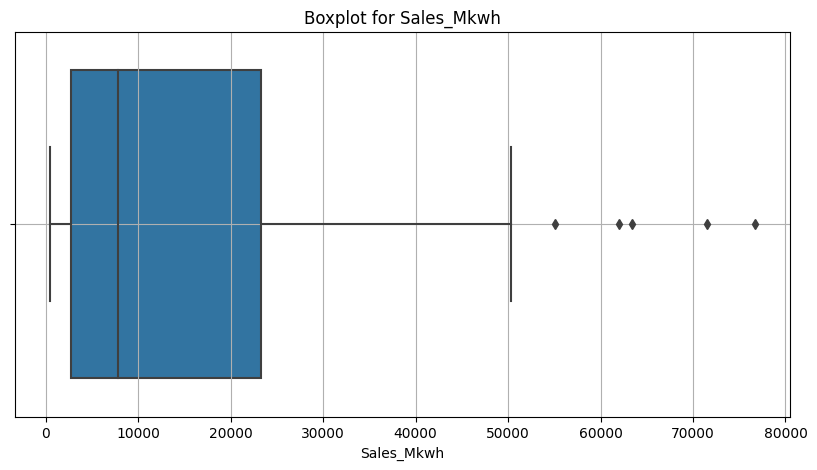

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


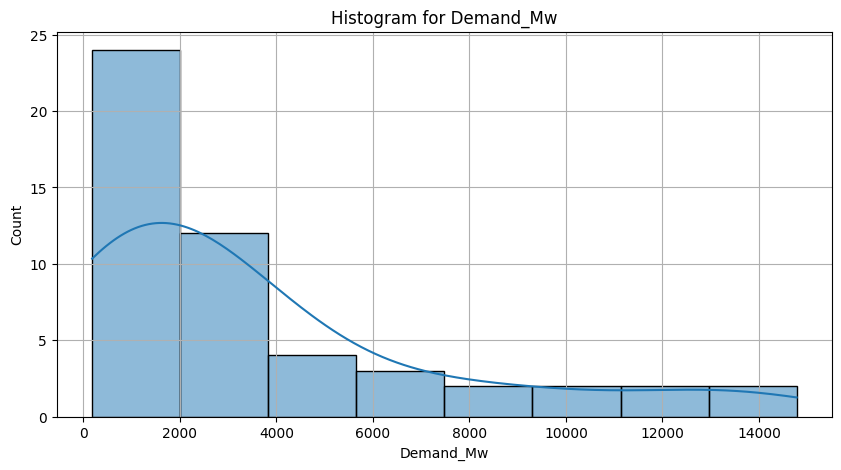

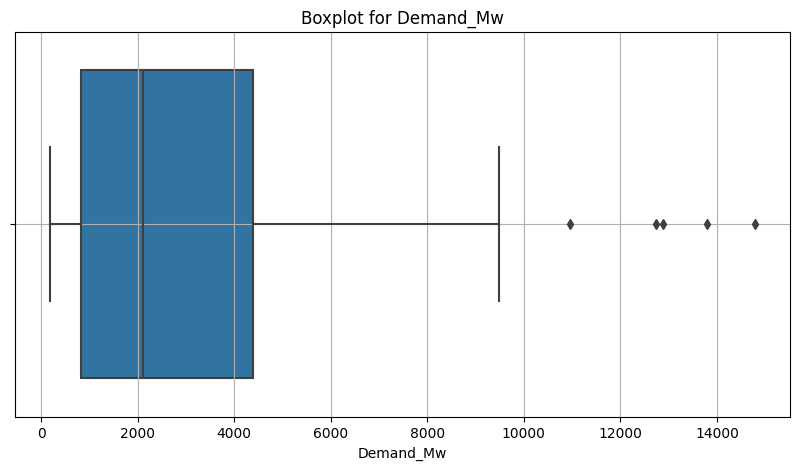

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


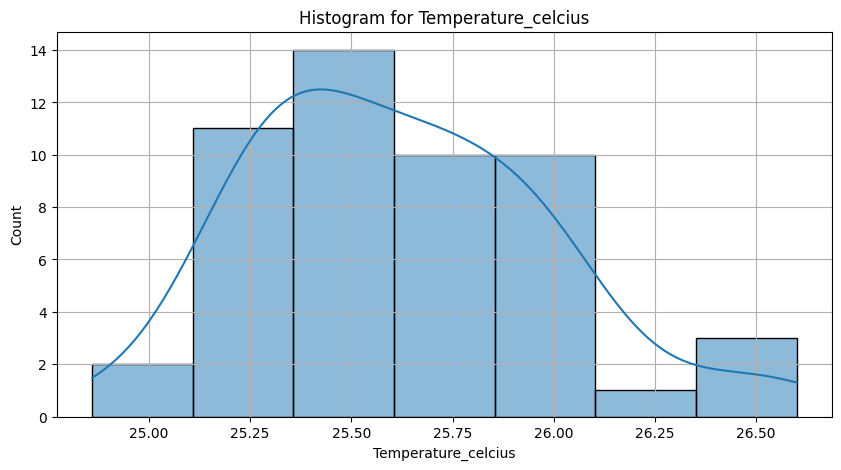

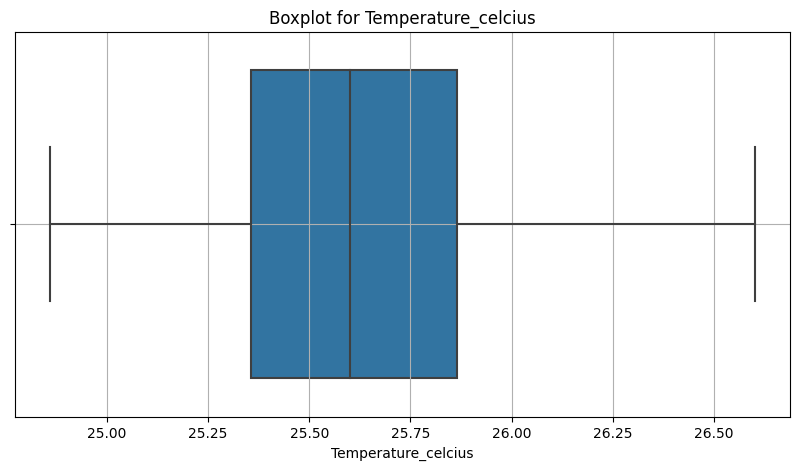

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/tanjumdata/tanjum.xlsx'
data = pd.read_excel(file_path)
# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
data = data.iloc[:-2]
# Identify columns that are dates or objects (non-numeric)
non_numeric_columns = data.select_dtypes(include=['datetime', 'object']).columns

# Remove the non-numeric columns from the dataset
data_numeric = data.drop(columns=non_numeric_columns)

# Plot histograms for each numeric column to check for normality
for column in data_numeric.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data_numeric[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.grid(True)
    plt.show()

    # Plot boxplots for each numeric column to check for outliers
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data_numeric[column])
    plt.title(f'Boxplot for {column}')
    plt.grid(True)
    plt.show()

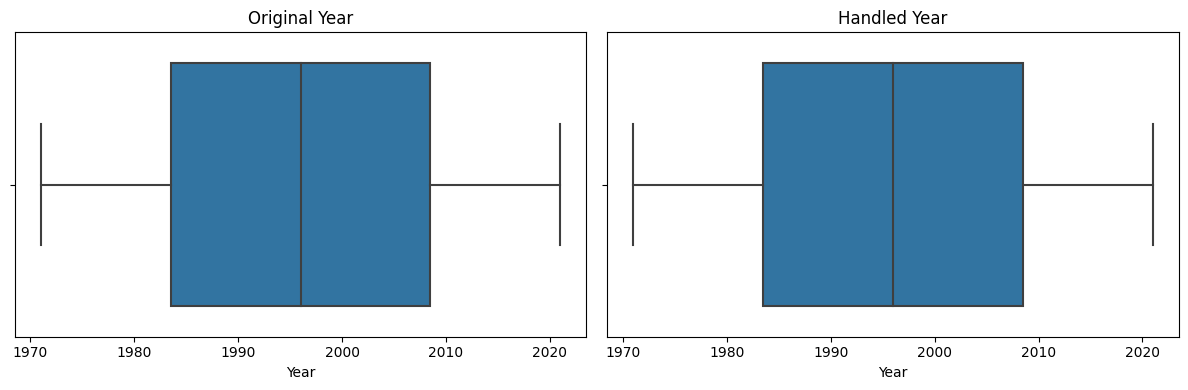

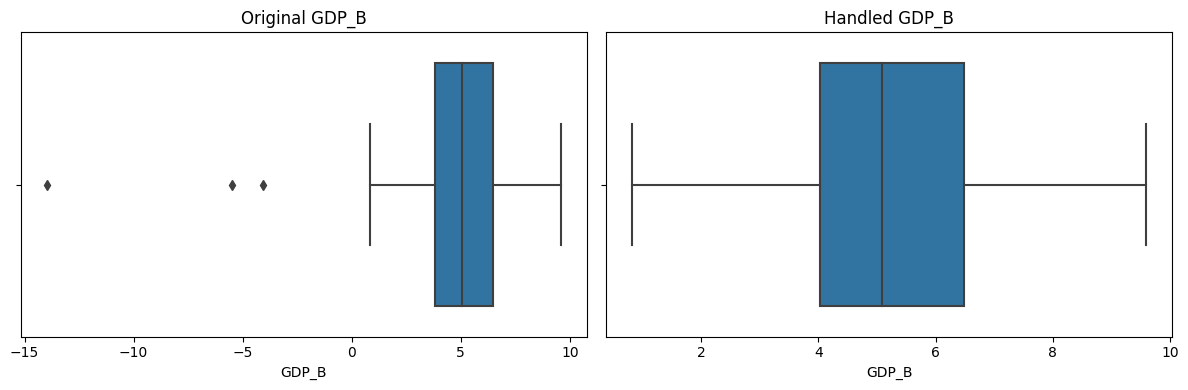

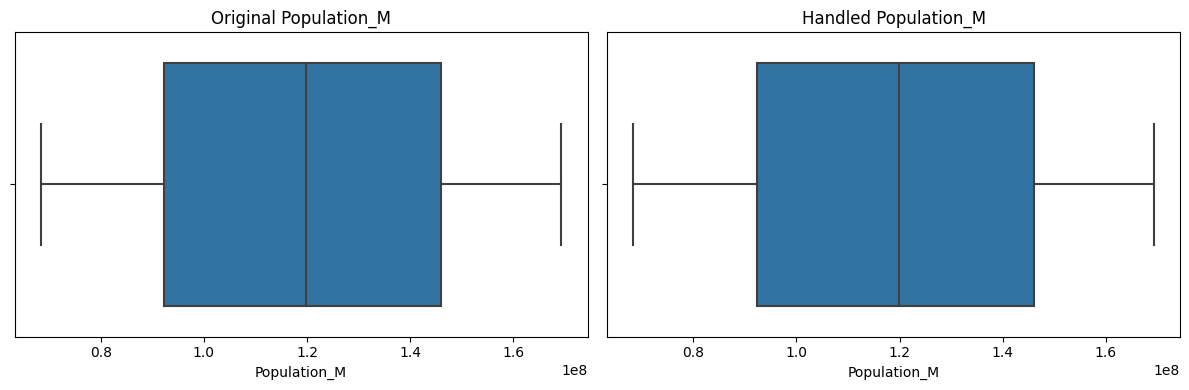

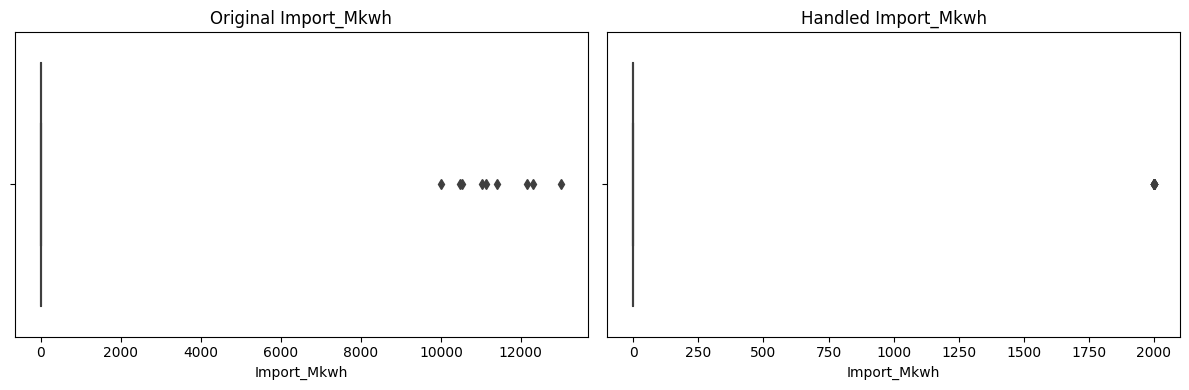

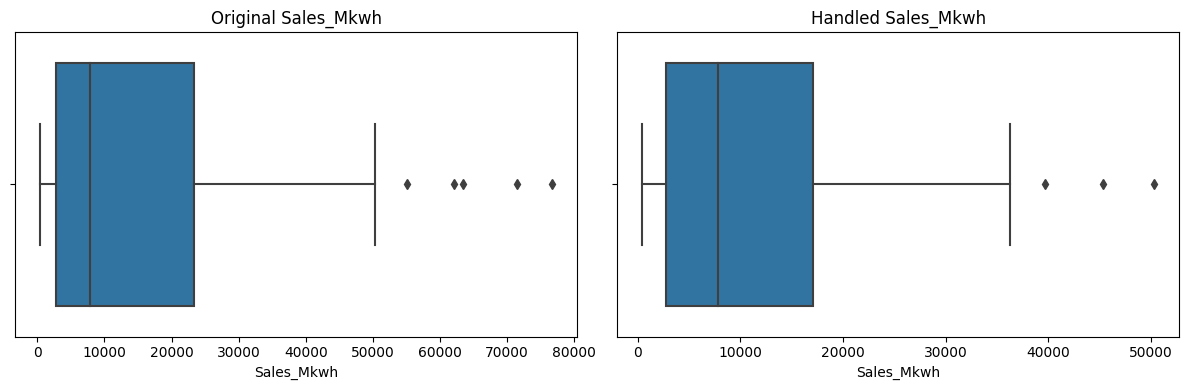

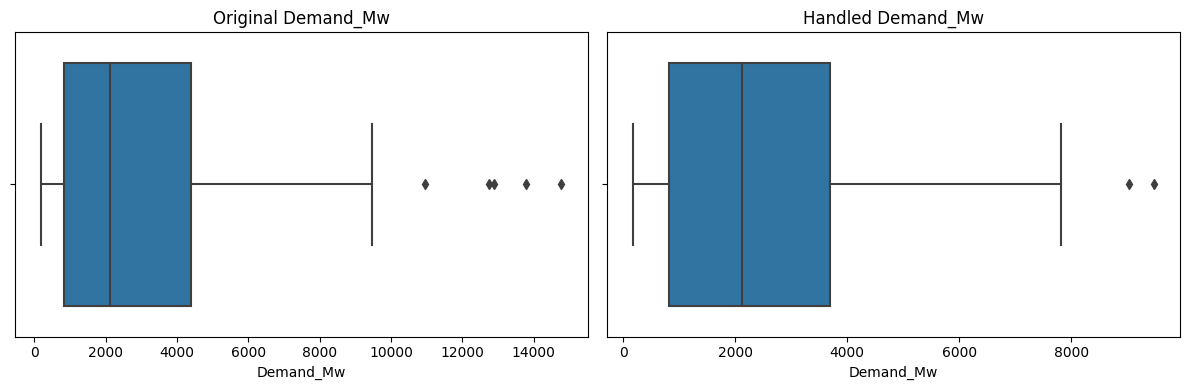

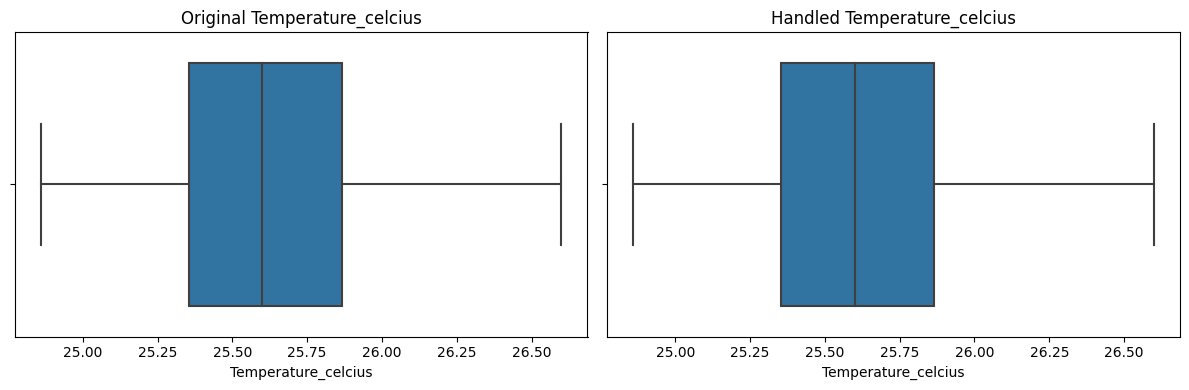

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns, excluding date or object type columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Function to replace outliers with the median values (a common method of handling outliers)
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    mean = df[column].mean()
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].mask(((df[column] < lower_bound) | (df[column] > upper_bound)), mean)
    return df

# Create a copy of the data for outlier handling
handled_data = numeric_data.copy()

# Handling outliers and visualizing boxplots before and after handling for each column
for column in numeric_data.columns:
    # Visualize boxplot before handling outliers
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=numeric_data[column])
    plt.title(f'Original {column}')

    # Handle outliers
    handled_data = replace_outliers_with_mean(handled_data, column)
    
    # Visualize boxplot after handling outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=handled_data[column])
    plt.title(f'Handled {column}')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_33/4074636840.py:62: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(data.index[-1], periods=10, freq='Y'), lrforecasted_values, label='Forecasted Demand_Mw', color='red', linestyle='--')


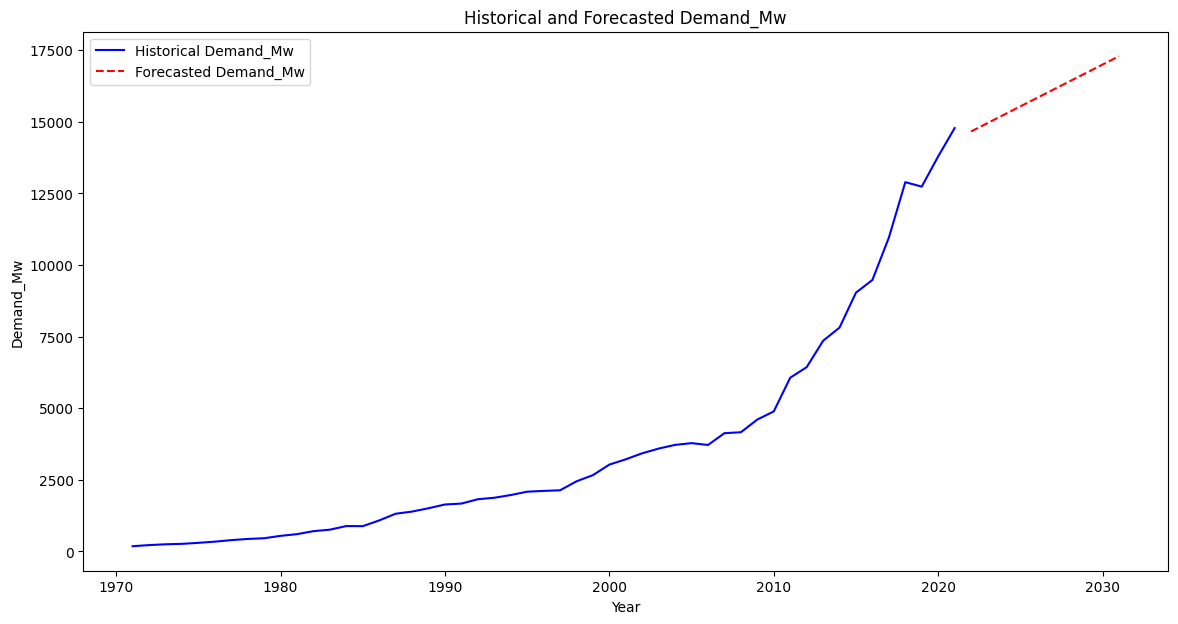

Mean Squared Error (MSE): 56676.48543805714
Mean Absolute Error (MAE): 191.8276203741941
Root Mean Squared Error (RMSE): 238.06823693650765
R-squared (R2): 0.9961925527477052


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/tanjumdata/tanjum.xlsx'  
data = pd.read_excel(file_path)
# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
data = data.iloc[:-2]
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np



# Convert 'Year' to datetime and set as index
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Select the features and target
X = data.drop(columns=['Demand_Mw'])
y = data['Demand_Mw']

# Create a Linear Regression model
lrmodel = LinearRegression()

# Fit the model
lrmodel.fit(X, y)

# Predict the historical Demand_Mw values
y_pred = lrmodel.predict(X)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y, y_pred)

# Determine the historical trend by calculating the average yearly increase
yearly_increase = np.diff(y).mean()

# Forecast the next 10 steps
lrforecasted_values = [y_pred[-1]]
for i in range(1, 10):
    # Predict the next value based on the historical trend
    next_value = lrforecasted_values[-1] + yearly_increase
    
    # Append the forecasted value to the list
    lrforecasted_values.append(next_value)

# Visualize the forecasted value with historical value
plt.figure(figsize=(14, 7))
plt.plot(data.index, y, label='Historical Demand_Mw', color='blue')
plt.plot(pd.date_range(data.index[-1], periods=10, freq='Y'), lrforecasted_values, label='Forecasted Demand_Mw', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Demand_Mw')
plt.title('Historical and Forecasted Demand_Mw')
plt.legend()
plt.show()




# Print performance metrics
# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


/tmp/ipykernel_33/2141519458.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=data.index[-1], periods=11, freq='Y')[1:]  # 10 future steps


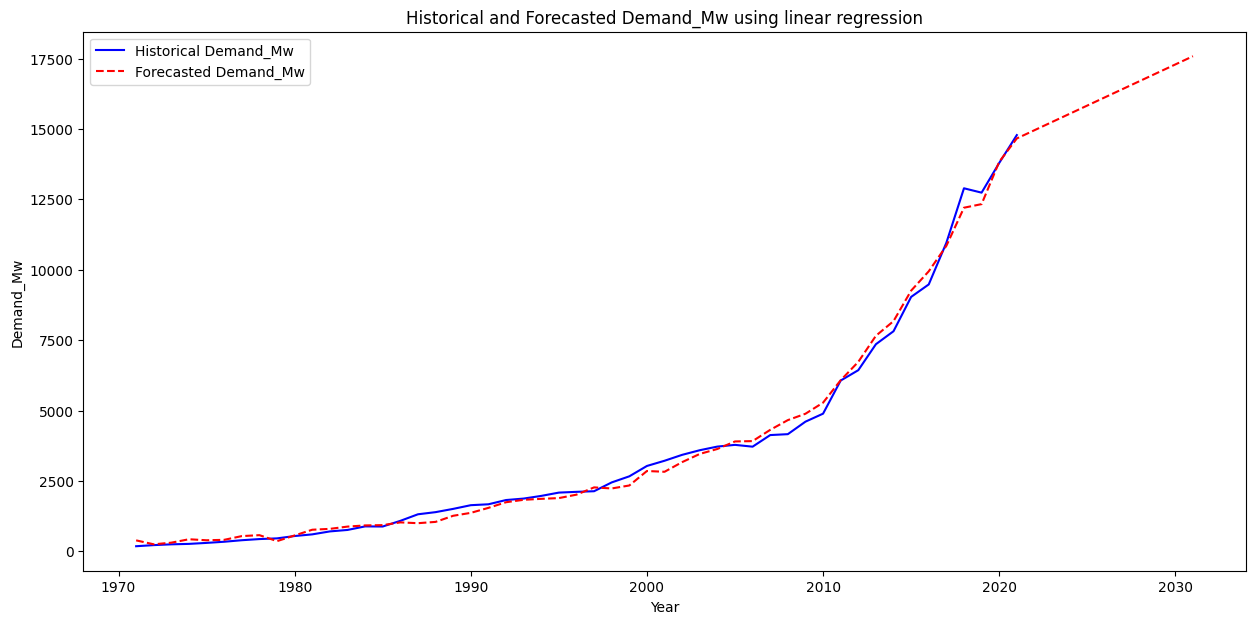

In [22]:
# Forecast the next 10 steps
future_years = pd.date_range(start=data.index[-1], periods=11, freq='Y')[1:]  # 10 future steps
yearly_increase = np.diff(y).mean()  # Calculate the average yearly increase
future_predictions = [y_pred[-1] + yearly_increase * i for i in range(1, 11)]

# Combine historical and future predictions
all_years = list(data.index.year) + list(future_years.year)
all_predictions = list(y_pred) + future_predictions

# Plotting the graph
plt.figure(figsize=(15, 7))
plt.plot(data.index.year, y, label='Historical Demand_Mw', color='blue')
plt.plot(all_years, all_predictions, label='Forecasted Demand_Mw', color='red', linestyle='--')

# Title and labels
plt.title('Historical and Forecasted Demand_Mw using linear regression')
plt.xlabel('Year')
plt.ylabel('Demand_Mw')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [16]:
# Access the coefficients (weights) of the linear regression model
coefficients = lrmodel.coef_

# Access the bias (intercept) of the linear regression model
bias = lrmodel.intercept_

# Print the coefficients and bias
print("Coefficients (weights):", coefficients)
print("Bias (intercept):", bias)

Coefficients (weights): [ 1.40911632e+00  1.20279888e-05  2.88955887e-02  1.69712661e-01
 -3.19425610e+02]
Bias (intercept): 7437.768273426756


In [5]:
lrforecasted_values

[14662.759230581254,
 14954.739230581254,
 15246.719230581253,
 15538.699230581253,
 15830.679230581252,
 16122.659230581252,
 16414.63923058125,
 16706.61923058125,
 16998.59923058125,
 17290.57923058125]

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'max_depth': None, 'n_estimators': 300}


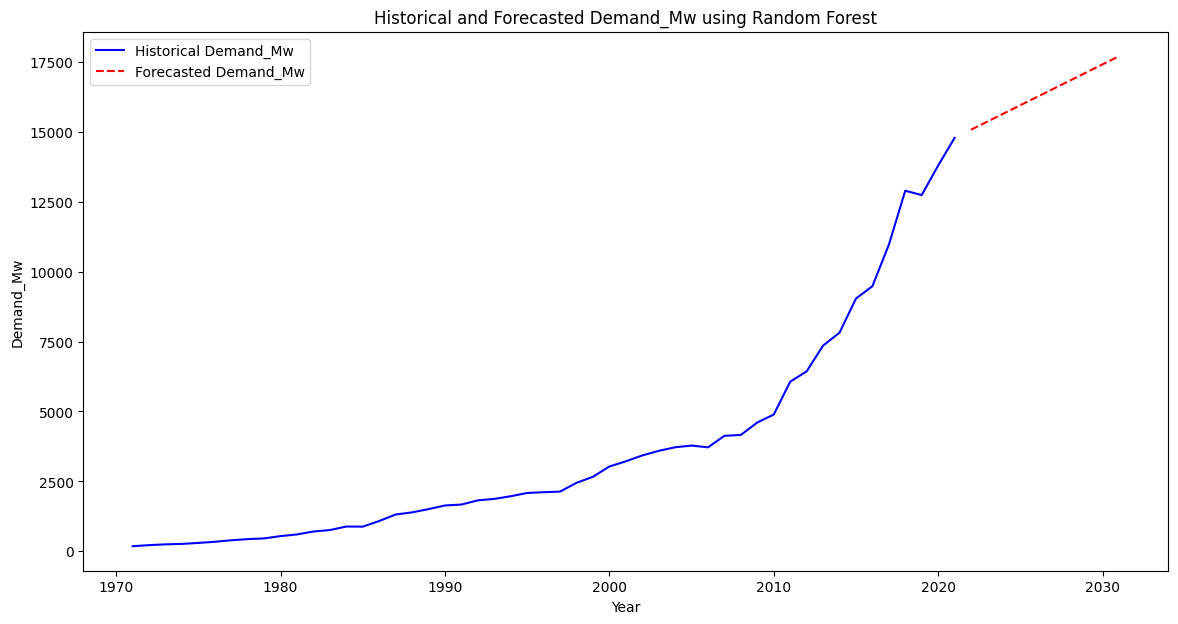

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/tanjumdata/tanjum.xlsx'    
data = pd.read_excel(file_path)
# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
data = data.iloc[:-2]

# Convert 'Year' to a suitable format and set it as the DataFrame index if not already
data['Year'] = pd.to_datetime(data['Year'], format='%Y').dt.year

# Preprocess the dataset
X = data.drop(columns=['Demand_Mw']) 
y = data['Demand_Mw']

# Parameter tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# GridSearchCV for finding the best parameters
clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
clf.fit(X, y)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", clf.best_params_)

# Train the Random Forest model with the best parameters
rfmodel = RandomForestRegressor(**clf.best_params_, random_state=42)
rfmodel.fit(X, y)

# Calculate the average yearly increase in 'Demand_Mw'
yearly_increase = np.diff(y).mean()

# Forecast the next 10 steps
last_year = X['Year'].iloc[-1]
forecast_years = np.arange(last_year + 1, last_year + 11)
rfforecasted_values = [y.iloc[-1] + yearly_increase * i for i in range(1, 11)]

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(data['Year'], y, label='Historical Demand_Mw', color='blue')
plt.plot(forecast_years, rfforecasted_values, label='Forecasted Demand_Mw', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Demand_Mw')
plt.title('Historical and Forecasted Demand_Mw using Random Forest')
plt.legend()
plt.show()

Best Parameters: {'max_depth': None, 'n_estimators': 100}


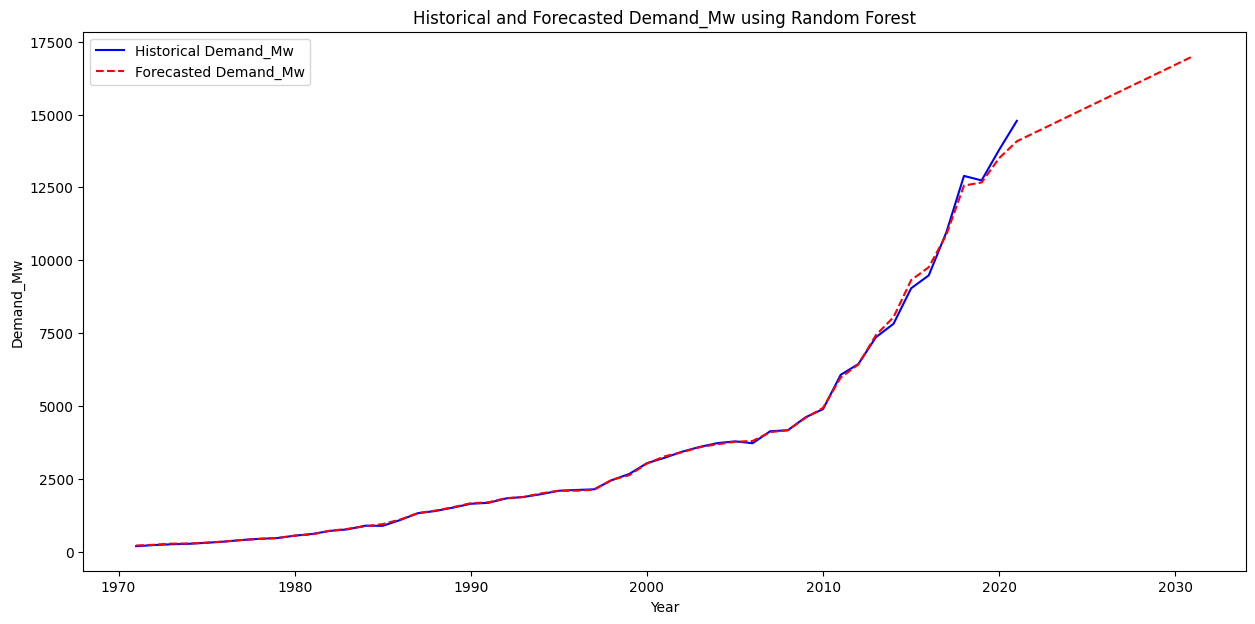

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/tanjumdata/tanjum.xlsx' 
data = pd.read_excel(file_path)

# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
data = data.iloc[:-2]

# Convert 'Year' to a suitable format and set it as the DataFrame index if not already
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Preprocess the dataset
X = data.drop(columns=['Demand_Mw'])
y = data['Demand_Mw']

# Parameter tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# GridSearchCV for finding the best parameters
clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
clf.fit(X, y)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", clf.best_params_)

# Train the Random Forest model with the best parameters
rfmodel = RandomForestRegressor(**clf.best_params_, random_state=42)
rfmodel.fit(X, y)

# Predict the historical Demand_Mw values
y_pred = rfmodel.predict(X)

# Forecast the next 10 steps
future_years = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=10, freq='YS')  # 10 future steps
yearly_increase = np.diff(y).mean()  # Calculate the average yearly increase
future_predictions = [y_pred[-1] + yearly_increase * i for i in range(1, 11)]

# Combine historical and future predictions
all_years = list(data.index.year) + list(future_years.year)
all_predictions = list(y_pred) + future_predictions

# Plotting the graph
plt.figure(figsize=(15, 7))
plt.plot(data.index.year, y, label='Historical Demand_Mw', color='blue')
plt.plot(all_years, all_predictions, label='Forecasted Demand_Mw', color='red', linestyle='--')

# Title and labels
plt.title('Historical and Forecasted Demand_Mw using Random Forest')
plt.xlabel('Year')
plt.ylabel('Demand_Mw')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Extract feature importances
feature_importances = rfmodel.feature_importances_
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the performance metrics and feature importances

print(importances_df)


               Feature  Importance
0                 Year    0.304754
4           Sales_Mkwh    0.300970
2         Population_M    0.279570
3          Import_Mkwh    0.102380
1                GDP_B    0.006688
5  Temperature_celcius    0.005637


In [6]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict the historical Demand_Mw values
y_pred = rfmodel.predict(X)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y, y_pred)
# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 27772.992569063168
Mean Absolute Error (MAE): 70.64679738562091
Root Mean Squared Error (RMSE): 166.65231042221757
R-squared (R2): 0.9981342490906453


In [5]:
rfforecasted_values

[15073.98,
 15365.96,
 15657.94,
 15949.92,
 16241.9,
 16533.88,
 16825.86,
 17117.84,
 17409.82,
 17701.8]

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/tmp/ipykernel_33/1517930894.py:69: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='A')[1:]


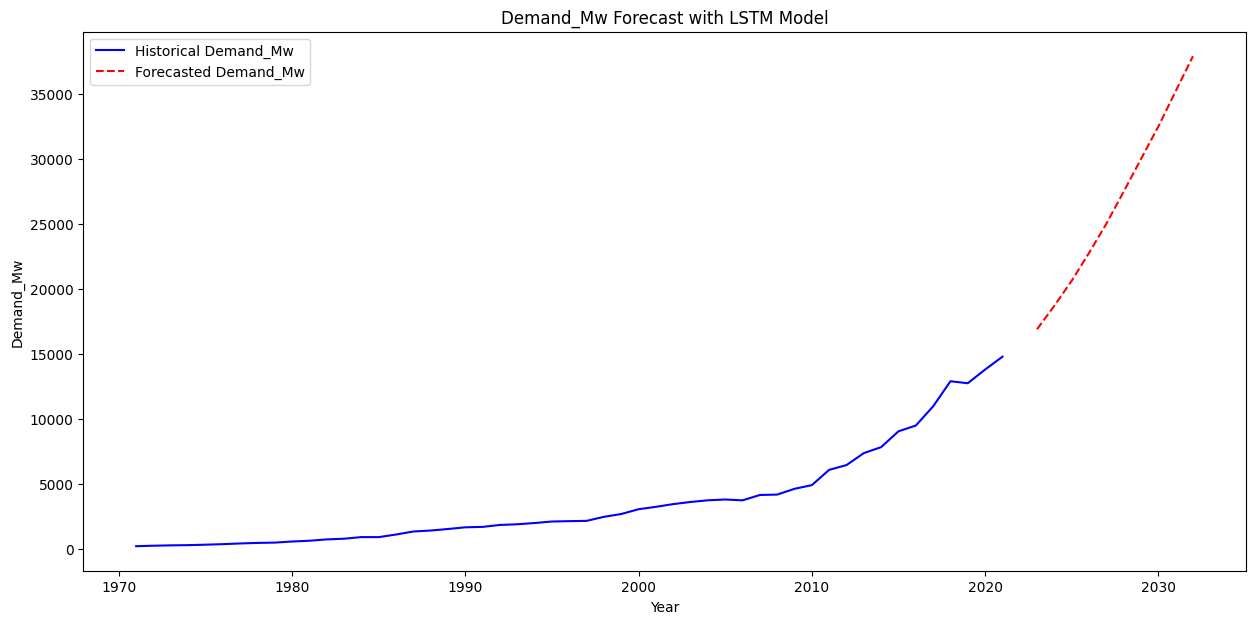

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = '/kaggle/input/tanjumdata/tanjum.xlsx'  
data = pd.read_excel(file_path)

# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())
data = data.iloc[:-2]

# Correct the date range if necessary
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Normalize 'Demand_Mw'
scaler = MinMaxScaler(feature_range=(0, 1))
data['Scaled_Demand_Mw'] = scaler.fit_transform(data[['Demand_Mw']].values)

# Prepare data for LSTM model
look_back = 10
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

scaled_demand = data['Scaled_Demand_Mw'].values.reshape(-1, 1)
X_lstm, y_lstm = create_dataset(scaled_demand, look_back)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], look_back, 1))

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# LSTM Model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=1000, batch_size=16, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0)

# Generating future forecasts using the LSTM model
future_steps = 10
forecasted_values = []
last_input_for_lstm = scaled_demand[-look_back:].reshape((1, look_back, 1))

for i in range(future_steps):
    pred_lstm_scaled = model_lstm.predict(last_input_for_lstm)
    pred_lstm = scaler.inverse_transform(pred_lstm_scaled)[0][0]
    
    new_input_sequence_scaled = np.append(last_input_for_lstm[0, 1:, :], pred_lstm_scaled).reshape(1, look_back, 1)
    last_input_for_lstm = new_input_sequence_scaled
    
    forecasted_values.append(pred_lstm)

# Visualization adjustments
forecast_years = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='A')[1:]
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Demand_Mw'], label='Historical Demand_Mw', color='blue')
plt.plot(forecast_years, forecasted_values, label='Forecasted Demand_Mw', color='red', linestyle='--')
plt.title('Demand_Mw Forecast with LSTM Model')
plt.xlabel('Year')
plt.ylabel('Demand_Mw')
plt.legend()
plt.show()


/tmp/ipykernel_33/240961236.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  "Year": pd.date_range(start="1971", end="2022", freq='Y').year,


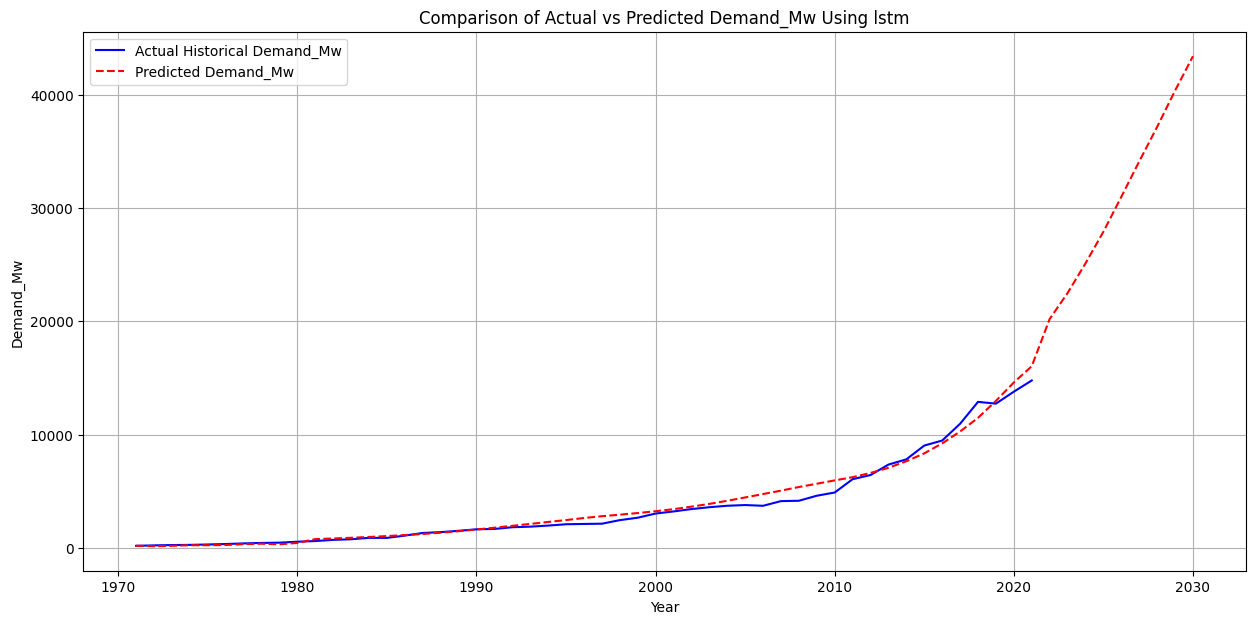

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Historical data
historical_data = {
    "Year": pd.date_range(start="1971", end="2022", freq='Y').year,
    "Demand_Mw": [
        183.0, 222.0, 250.0, 266.0, 301.0, 342.0, 396.0, 437.0, 462.0, 545.0,
        604.0, 709.0, 761.0, 887.0, 883.0, 1084.0, 1317.0, 1393.0, 1509.0, 1640.0,
        1672.0, 1823.0, 1875.0, 1970.0, 2087.0, 2114.0, 2136.0, 2449.0, 2665.0,
        3033.0, 3218.0, 3428.0, 3592.0, 3721.0, 3782.0, 3718.0, 4130.0, 4162.0,
        4606.0, 4890.0, 6066.0, 6434.0, 7356.0, 7817.0, 9036.0, 9479.0, 10958.0,
        12893.0, 12738.0, 13792.0, 14782.0
    ]
}

# Historical predictions
historical_predictions = [188.02, 147.57, 184.73, 237.03, 237.44, 255.59, 333.40, 369.40, 321.06, 434.45,
                          774.51, 830.38, 892.90, 962.55, 1044.26, 1130.11, 1227.46, 1342.98, 1474.83, 1623.99,
                          1782.79, 1947.93, 2115.73, 2288.76, 2456.44, 2636.93, 2797.50, 2931.24, 3076.66, 3234.69,
                          3418.48, 3640.69, 3884.36, 4159.59, 4453.58, 4753.01, 5053.69, 5375.43, 5664.81, 5959.70,
                          6244.47, 6618.06, 7072.20, 7649.98, 8348.10, 9225.06, 10275.95, 11480.21, 12983.00, 14604.02,
                          16039.43]

# Future predictions (from 2021 to 2031)
future_predictions = [18136.104, 20207.463, 22502.96, 25119.473, 27912.14, 30992.22, 34120.445,
                      37170.18, 40369.41, 43411.957]

# Combine the historical and forecasted years
years = list(historical_data["Year"]) + [year for year in range(2022, 2031)]

# Combine the predictions (historical predictions up to 2021 and future predictions from 2021)
all_predictions = historical_predictions + future_predictions[1:]

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(historical_data["Year"], historical_data["Demand_Mw"], label='Actual Historical Demand_Mw', color='blue')
plt.plot(years, all_predictions, label='Predicted Demand_Mw', color='red', linestyle='--')
plt.title('Comparison of Actual vs Predicted Demand_Mw Using lstm')
plt.xlabel('Year')
plt.ylabel('Demand_Mw')
plt.legend()
plt.grid(True)
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


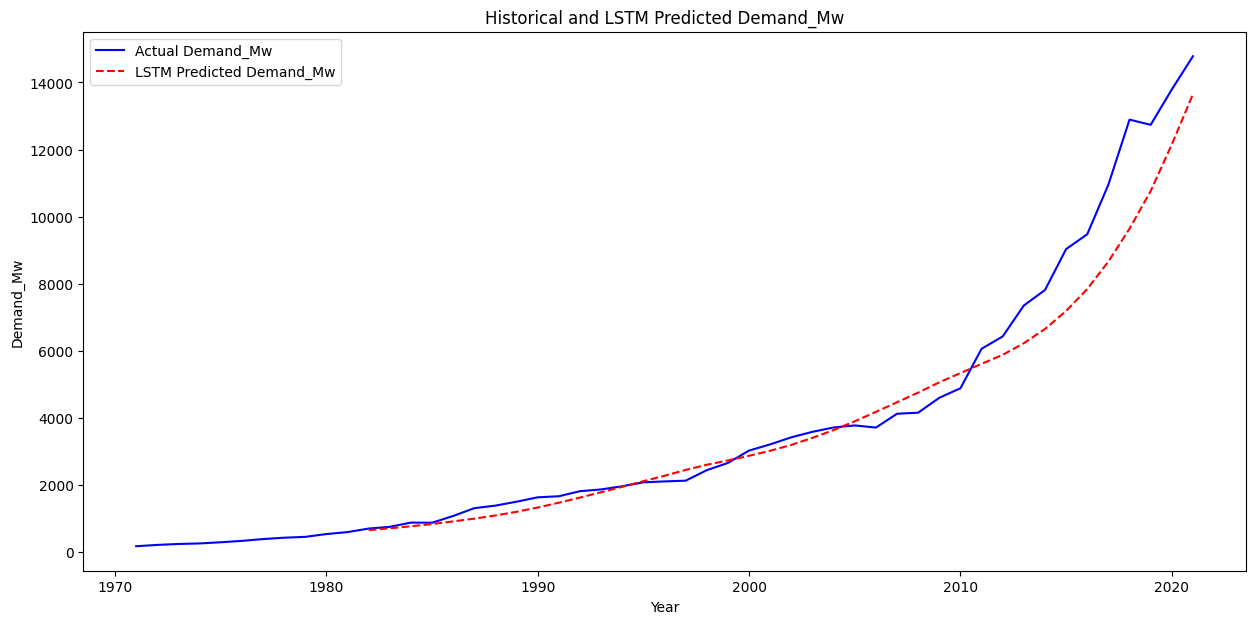

In [11]:

# Predict the historical Demand_Mw values
y_pred_lstm = model_lstm.predict(X_lstm)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

# Prepare the full list of actual Demand_Mw values for plotting
actual_demand = list(data['Demand_Mw'])

# Prepare the full list of LSTM predictions for plotting
# Pad the beginning of the predictions with NaNs to align with the actual data
lstm_predictions = [np.nan] * (look_back + 1) 
lstm_predictions.extend(y_pred_lstm)

# Ensure that 'actual_demand' and 'lstm_predictions' have the same length
if len(actual_demand) != len(lstm_predictions):
    min_length = min(len(actual_demand), len(lstm_predictions))
    actual_demand = actual_demand[:min_length]
    lstm_predictions = lstm_predictions[:min_length]

# Plotting the graph
plt.figure(figsize=(15, 7))
plt.plot(data.index.year, actual_demand, label='Actual Demand_Mw', color='blue')
plt.plot(data.index.year, lstm_predictions, label='LSTM Predicted Demand_Mw', color='red', linestyle='--')

# Title and labels
plt.title('Historical and LSTM Predicted Demand_Mw')
plt.xlabel('Year')
plt.ylabel('Demand_Mw')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [10]:

# Predict the historical Demand_Mw values using the LSTM model
y_pred_lstm = model_lstm.predict(X_lstm)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

# Extract the corresponding years for the predictions
# Since we're using a look_back period, the first few years won't have predictions
predicted_years = data.index.year[look_back:]

# Combine the predicted values with their respective years
predicted_data = list(zip(predicted_years, y_pred_lstm))

# Print the predicted data
for year, value in predicted_data:
    print(f"Year: {year}, Predicted Demand_Mw: {value}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
Year: 1981, Predicted Demand_Mw: 662.4497680664062
Year: 1982, Predicted Demand_Mw: 716.31640625
Year: 1983, Predicted Demand_Mw: 776.453369140625
Year: 1984, Predicted Demand_Mw: 843.5701904296875
Year: 1985, Predicted Demand_Mw: 922.1864013671875
Year: 1986, Predicted Demand_Mw: 1005.1617431640625
Year: 1987, Predicted Demand_Mw: 1098.8798828125
Year: 1988, Predicted Demand_Mw: 1209.55322265625
Year: 1989, Predicted Demand_Mw: 1336.103759765625
Year: 1990, Predicted Demand_Mw: 1479.5284423828125
Year: 1991, Predicted Demand_Mw: 1632.383056640625
Year: 1992, Predicted Demand_Mw: 1791.8006591796875
Year: 1993, Predicted Demand_Mw: 1953.7366943359375
Year: 1994, Predicted Demand_Mw: 2120.769287109375
Year: 1995, Predicted Demand_Mw: 2282.52685546875
Year: 1996, Predicted Demand_Mw: 2456.029296875
Year: 1997, Predicted Demand_Mw: 2610.307861328125
Year: 1998, Predicted Demand_Mw: 2739.044189453125
Year: 1999, Predicted Demand_Mw: 2877.89697265625
Ye

In [50]:
# Predict on testing set
testPredict = model_lstm.predict(X_test_lstm)

# Inverse scaling for a forecast
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([y_test_lstm])

# Calculate performance metrics
mae = mean_absolute_error(testY_inverse[0], testPredict[:,0])
mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
rmse = np.sqrt(mse)
r2 = r2_score(testY_inverse[0], testPredict[:,0])

print("LSTM Model Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
LSTM Model Performance on Test Data:
Mean Absolute Error (MAE): 496.178771972656
Mean Squared Error (MSE): 423821.40491914324
Root Mean Squared Error (RMSE): 651.015671792272
R² Score: 0.9665134069767779


In [70]:
forecasted_values

[18136.104,
 20207.463,
 22502.96,
 25119.473,
 27912.14,
 30992.22,
 34120.445,
 37170.18,
 40369.41,
 43411.957]

Epoch 1/1000


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - loss: 0.0246 - val_loss: 0.4343
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0174 - val_loss: 0.3609
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0119 - val_loss: 0.2893
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0077 - val_loss: 0.2220
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0064 - val_loss: 0.1644
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0075 - val_loss: 0.1221
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0103 - val_loss: 0.1008
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0121 - val_loss: 0.0965
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - val_loss: 0.1020
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0078 - val_loss: 0.1097
Epoch 11/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0070 - val_loss: 0.1154
Epoch 12/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0063 - val_lo

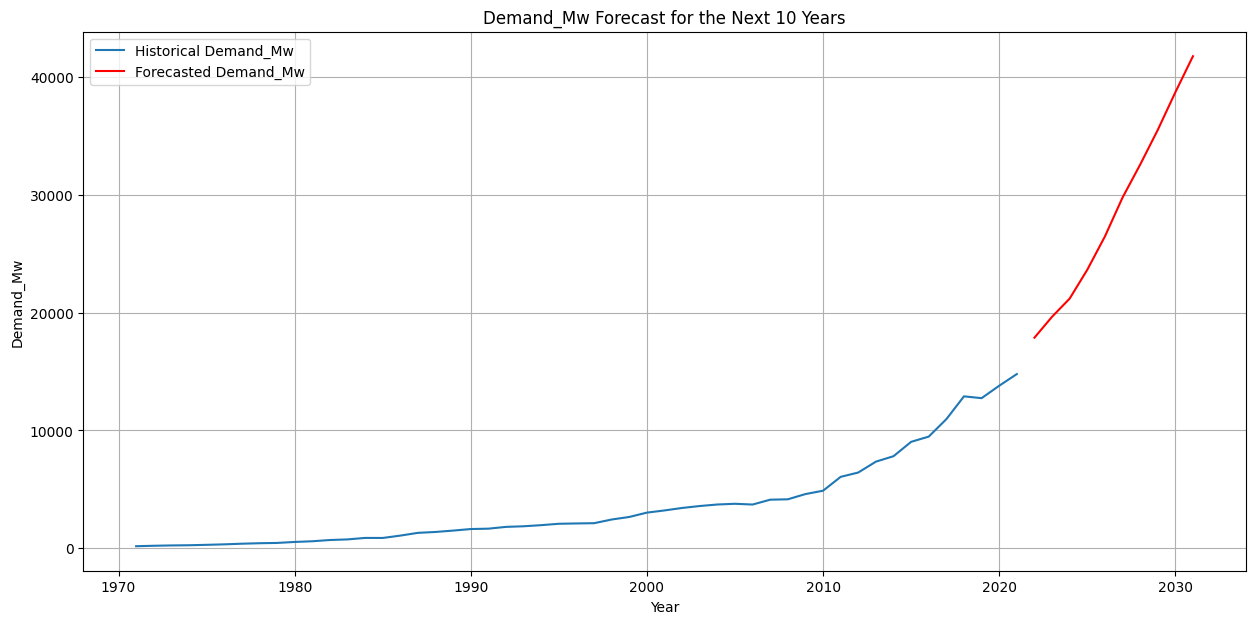

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
LSTM Model Performance on Test Data:
Mean Absolute Error (MAE): 771.1416503906249
Mean Squared Error (MSE): 748006.5887124774
Root Mean Squared Error (RMSE): 864.8737414862804
R² Score: 0.9027436725629754


In [12]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = '/kaggle/input/tanjumdata/tanjum.xlsx'  
data = pd.read_excel(file_path)
# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
data = data.iloc[:-2]
data = data.dropna(subset=['Demand_Mw'])  # Ensure no missing target values

# Normalize the target variable 'Demand_Mw'
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_demand = scaler.fit_transform(data[['Demand_Mw']].values)

# Prepare data for LSTM
look_back = 5
X, y = [], []
for i in range(len(scaled_demand) - look_back):
    X.append(scaled_demand[i:(i + look_back), 0])
    y.append(scaled_demand[i + look_back, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
trainX, trainY = X[:train_size], y[:train_size]
testX, testY = X[train_size:], y[train_size:]

# Define and compile the LSTM model
lstmmodel = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])
lstmmodel.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lstmmodel.fit(trainX, trainY, epochs=1000, batch_size=16, validation_data=(testX, testY), callbacks=[early_stopping], shuffle=False)

# Forecasting the next 10 steps beyond the dataset
last_values = scaled_demand[-look_back:]
lstmforecast = []
for _ in range(10):  # Forecast 10 future steps
    last_values_reshaped = np.reshape(last_values, (1, look_back, 1))
    prediction = lstmmodel.predict(last_values_reshaped)
    lstmforecast.append(prediction[0, 0])  # Add the prediction
    last_values = np.vstack((last_values[1:], prediction))  # Update last_values

# Inverse transform to get actual forecast values
lstmforecast = np.array(lstmforecast).reshape(-1, 1)
lstmforecast = scaler.inverse_transform(lstmforecast).flatten()

# Prepare data for plotting
historical_years = data['Year'].values
forecast_years = np.arange(historical_years[-1] + 1, historical_years[-1] + 11)

# Plotting historical and forecasted values
plt.figure(figsize=(15, 7))
plt.plot(historical_years, data['Demand_Mw'].values, label='Historical Demand_Mw')
plt.plot(forecast_years, lstmforecast, label='Forecasted Demand_Mw', color='red')
plt.title('Demand_Mw Forecast for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Demand_Mw')
plt.legend()
plt.grid(True)
plt.show()

# Predict on testing set
testPredict = lstmmodel.predict(testX)

# Inverse scaling for a forecast
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

# Calculate performance metrics
mae = mean_absolute_error(testY_inverse[0], testPredict[:,0])
mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
rmse = np.sqrt(mse)
r2 = r2_score(testY_inverse[0], testPredict[:,0])

print("LSTM Model Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

In [10]:
# Predict on testing set
testPredict = lstmmodel.predict(testX)

# Inverse scaling for a forecast
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

# Calculate performance metrics
mae = mean_absolute_error(testY_inverse[0], testPredict[:,0])
mse = mean_squared_error(testY_inverse[0], testPredict[:,0])
rmse = np.sqrt(mse)
r2 = r2_score(testY_inverse[0], testPredict[:,0])

print("LSTM Model Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
LSTM Model Performance on Test Data:
Mean Absolute Error (MAE): 870.613916015625
Mean Squared Error (MSE): 930256.631205773
Root Mean Squared Error (RMSE): 964.4981240032419
R² Score: 0.8790473975894499


In [4]:
lstmforecast

array([17959.39 , 19887.682, 21620.701, 24391.156, 27706.871, 31730.182,
       35369.17 , 39315.91 , 43669.19 , 47917.484], dtype=float32)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


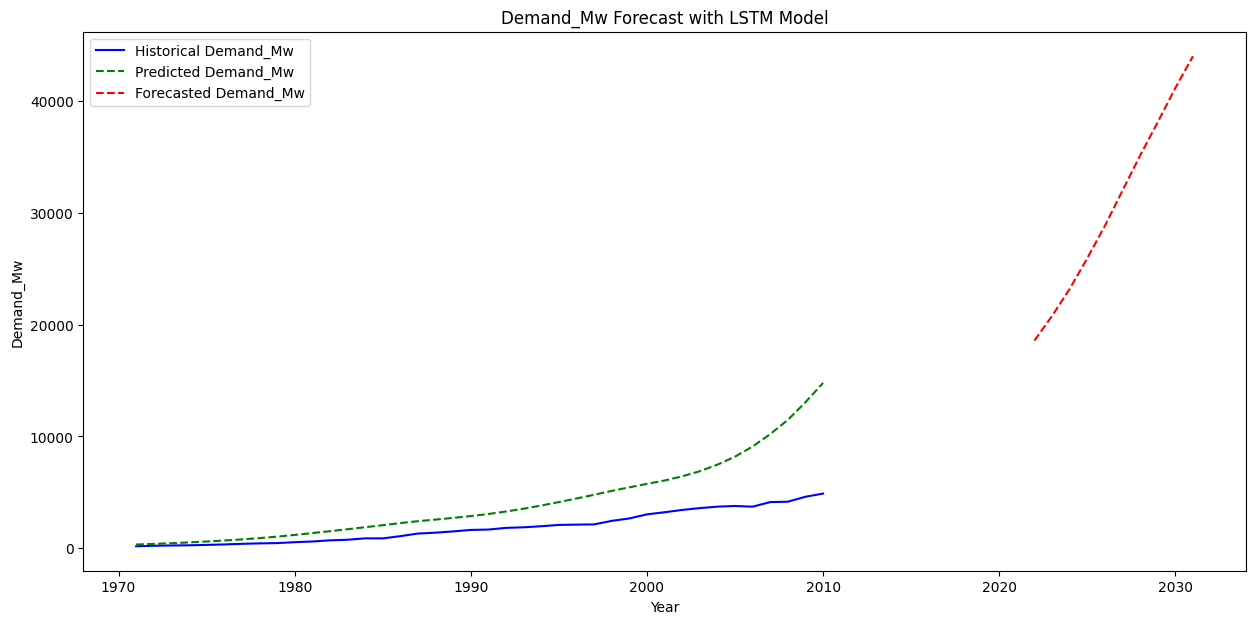

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# Load the dataset
file_path = '/kaggle/input/tanjumdata/tanjum.xlsx'
data = pd.read_excel(file_path)
# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
data = data.iloc[:-2]

# Convert 'Year' to a suitable format and set it as the DataFrame index if not already
data['Year'] = pd.to_datetime(data['Year'], format='%Y').dt.year


# Normalize the target variable 'Demand_Mw' for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
data['Scaled_Demand_Mw'] = scaler.fit_transform(data[['Demand_Mw']])

# Prepare data for LSTM model
look_back = 10
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

scaled_demand = data['Scaled_Demand_Mw'].values.reshape(-1, 1)
X_lstm, y_lstm = create_dataset(scaled_demand, look_back)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], look_back, 1))

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Example split for demonstration purposes
X_train, X_val, y_train, y_val = train_test_split(data, data['Demand_Mw'], test_size=0.2, random_state=42)

# Train each model (Placeholder for model training)
# LSTM Model
# Ensure your data is prepared correctly for LSTM input
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_lstm.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Random Forest Model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Generate predictions for the validation set
pred_lr = model_lr.predict(X_val)
pred_rf = model_rf.predict(X_val)
pred_lstm = model_lstm.predict(X_val).flatten()  # Flatten for compatibility

# Combine predictions for meta-model training
X_meta = np.column_stack((pred_lr, pred_rf, pred_lstm))

# Train meta-model
meta_model = GradientBoostingRegressor(random_state=42)
meta_model.fit(X_meta, y_val)


final_predictions = meta_model.predict(X_meta)

# Evaluate ensemble performance
mse = mean_squared_error(y_val, final_predictions)
r2 = r2_score(y_val, final_predictions)
mae = mean_absolute_error(y_val, final_predictions)

rmse = sqrt(mse)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")





/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/tmp/ipykernel_33/2559359829.py:124: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='A')[1:]


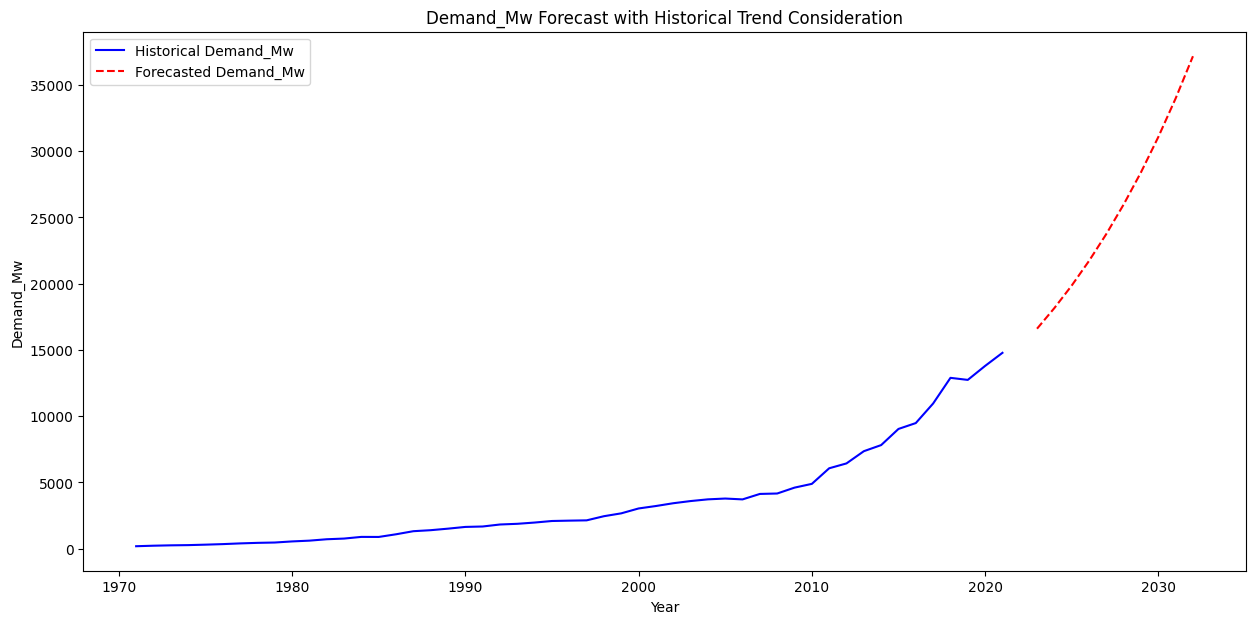

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = '/kaggle/input/tanjumdata/tanjum.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)
# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
data = data.iloc[:-2]

# Correct the date range if necessary
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Normalize 'Demand_Mw'
scaler = MinMaxScaler(feature_range=(0, 1))
data['Scaled_Demand_Mw'] = scaler.fit_transform(data[['Demand_Mw']].values)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# Prepare data for LSTM model
look_back = 5
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

scaled_demand = data['Scaled_Demand_Mw'].values.reshape(-1, 1)
X_lstm, y_lstm = create_dataset(scaled_demand, look_back)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], look_back, 1))

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.1, random_state=42)

# LSTM Model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=1000, batch_size=16, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0)

# Prepare the data for Linear Regression and Random Forest models
X = data.drop(columns=['Demand_Mw', 'Scaled_Demand_Mw']).values if 'Scaled_Demand_Mw' in data else data.drop(columns=['Demand_Mw']).values  # Adjust based on your actual features
y = data['Demand_Mw'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Random Forest Model
model_rf = RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42)
model_rf.fit(X_train, y_train)

# Generating future forecasts using an ensemble approach
future_steps = 10
forecasted_values = []
last_input_for_lstm = scaled_demand[-look_back:].reshape((1, look_back, 1))
# Use the last known historical value as the starting point for forecasts
last_known_value = data['Demand_Mw'].iloc[-1]
last_known_features = X[-1].reshape(1, -1)
future_features_for_lr_rf = np.tile(last_known_features, (future_steps, 1))

# Calculate historical growth rates
historical_growth_rates = []
for i in range(1, len(data['Demand_Mw'])):
    growth_rate = (data['Demand_Mw'].iloc[i] - data['Demand_Mw'].iloc[i-1]) / data['Demand_Mw'].iloc[i-1]
    historical_growth_rates.append(growth_rate)

# Calculate the average historical growth rate; this could be refined to weigh recent growth more heavily
average_historical_growth = np.mean(historical_growth_rates)

# Use this average growth rate to inform the minimum expected growth in forecasts
min_growth_rate = average_historical_growth
forecasted_values = [last_known_value]  

for i in range(future_steps):
    # Ensemble model predictions as before
    pred_lstm_scaled = model_lstm.predict(last_input_for_lstm)
    pred_lstm = scaler.inverse_transform(pred_lstm_scaled)[0][0]
    
    new_input_sequence_scaled = np.append(last_input_for_lstm[0, 1:, :], pred_lstm_scaled).reshape(1, look_back, 1)
    last_input_for_lstm = new_input_sequence_scaled

    pred_lr = model_lr.predict([future_features_for_lr_rf[i]])[0]
    pred_rf = model_rf.predict([future_features_for_lr_rf[i]])[0]

    ensemble_pred = np.mean([pred_lstm, pred_lr, pred_rf])
    
    # Adjust forecast based on historical growth pattern
    adjusted_pred = forecasted_values[-1] * (1 + min_growth_rate)
    
    # Compare adjusted forecast to ensemble prediction; choose higher to maintain growth trend
    final_forecast = max(ensemble_pred, adjusted_pred)
    
    forecasted_values.append(final_forecast)

# Visualization adjustments
forecast_years = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='A')[1:]
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Demand_Mw'], label='Historical Demand_Mw', color='blue')
plt.plot(forecast_years, forecasted_values[1:], label='Forecasted Demand_Mw', color='red', linestyle='--')
plt.title('Demand_Mw Forecast with Historical Trend Consideration')
plt.xlabel('Year')
plt.ylabel('Demand_Mw')
plt.legend()
plt.show()


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = '/kaggle/input/tanjumdata/tanjum.xlsx' 
data = pd.read_excel(file_path)

# Filling missing values
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())
data = data.iloc[:-2]

# Correct the date range if necessary
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Normalize 'Demand_Mw'
scaler = MinMaxScaler(feature_range=(0, 1))
data['Scaled_Demand_Mw'] = scaler.fit_transform(data[['Demand_Mw']].values)

# Split indices first
valid_indices = range(look_back, len(data))
train_idx, val_idx = train_test_split(list(valid_indices), test_size=0.2, random_state=42)

# LSTM dataset preparation
look_back = 5
def create_dataset(dataset, indices):
    X, Y = [], []
    for i in indices:
        a = dataset[(i-look_back):i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

scaled_demand = data['Scaled_Demand_Mw'].values.reshape(-1, 1)
X_lstm_train, y_lstm_train = create_dataset(scaled_demand, train_idx)
X_lstm_val, y_lstm_val = create_dataset(scaled_demand, val_idx)
X_lstm_train = X_lstm_train.reshape((-1, look_back, 1))
X_lstm_val = X_lstm_val.reshape((-1, look_back, 1))

# Prepare data for other models
X = data.drop(columns=['Demand_Mw', 'Scaled_Demand_Mw']).values
y = data['Demand_Mw'].values
X_train = X[train_idx]
X_val = X[val_idx]
y_train = y[train_idx]
y_val = y[val_idx]

# Model training
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=300, random_state=42)
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_lstm_train, y_lstm_train, epochs=100, batch_size=16, validation_data=(X_lstm_val, y_lstm_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0)

# Generate predictions for the validation set
preds_lr_val = model_lr.predict(X_val)
preds_rf_val = model_rf.predict(X_val)
preds_lstm_val_scaled = model_lstm.predict(X_lstm_val)
preds_lstm_val = scaler.inverse_transform(preds_lstm_val_scaled).flatten()

# Stack predictions into a matrix for regression
stacked_preds_val = np.column_stack((preds_lr_val, preds_rf_val, preds_lstm_val))
weight_model = LinearRegression()
weight_model.fit(stacked_preds_val, y_val)
weights = weight_model.coef_
print("Optimal weights for LR, RF, LSTM:", weights)

# Forecast future values
future_steps = 10
forecasted_values = []
last_known_input = scaled_demand[-look_back:]
last_input_for_lstm = last_known_input.reshape((1, look_back, 1))

for _ in range(future_steps):
    pred_lr = model_lr.predict([X[-1]])[0]
    pred_rf = model_rf.predict([X[-1]])[0]
    pred_lstm_scaled = model_lstm.predict(last_input_for_lstm)
    pred_lstm = scaler.inverse_transform(pred_lstm_scaled)[0][0]

    # Update LSTM input
    last_input_for_lstm = np.append(last_input_for_lstm[:, 1:, :], pred_lstm_scaled).reshape(1, look_back, 1)

    # Ensemble prediction using optimized weights
    ensemble_pred = pred_lr * weights[0] + pred_rf * weights[1] + pred_lstm * weights[2]
    forecasted_values.append(ensemble_pred)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
Optimal weights for LR, RF, LSTM: [0.63604478 0.18618909 0.17662095]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [16]:
# Print historical predictions with respective years
for year, prediction in zip(data.index, historical_predictions):
    print(f"Year: {year.year}, Historical Prediction: {prediction:.2f}")


Year: 1971, Historical Prediction: 188.02
Year: 1972, Historical Prediction: 147.57
Year: 1973, Historical Prediction: 184.73
Year: 1974, Historical Prediction: 237.03
Year: 1975, Historical Prediction: 237.44
Year: 1976, Historical Prediction: 255.59
Year: 1977, Historical Prediction: 333.40
Year: 1978, Historical Prediction: 369.40
Year: 1979, Historical Prediction: 321.06
Year: 1980, Historical Prediction: 434.45
Year: 1981, Historical Prediction: 534.14
Year: 1982, Historical Prediction: 592.88
Year: 1983, Historical Prediction: 687.95
Year: 1984, Historical Prediction: 742.00
Year: 1985, Historical Prediction: 812.16
Year: 1986, Historical Prediction: 929.75
Year: 1987, Historical Prediction: 1027.22
Year: 1988, Historical Prediction: 1096.48
Year: 1989, Historical Prediction: 1261.58
Year: 1990, Historical Prediction: 1390.87
Year: 1991, Historical Prediction: 1545.32
Year: 1992, Historical Prediction: 1701.79
Year: 1993, Historical Prediction: 1792.51
Year: 1994, Historical Pred

/tmp/ipykernel_33/224274267.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  "Year": pd.date_range(start="1971", end="2022", freq='Y').year,
/tmp/ipykernel_33/224274267.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  historical_years = pd.date_range(start="1971", end="2022", freq='Y').year
/tmp/ipykernel_33/224274267.py:28: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start="2022", periods=10, freq='Y').year


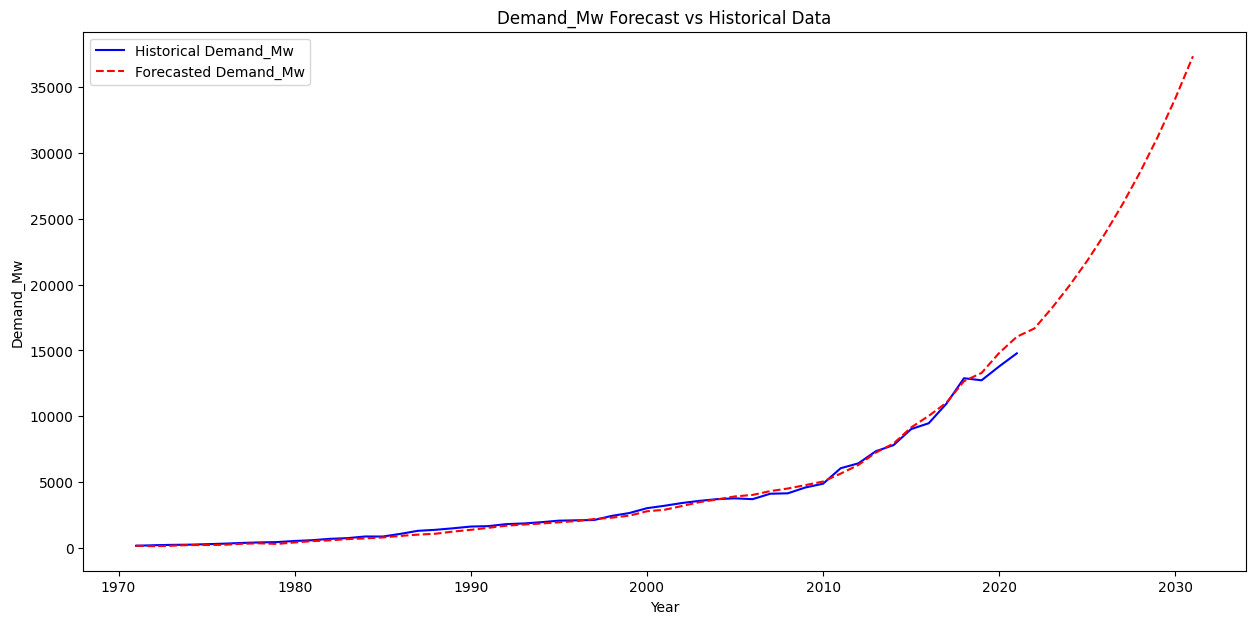

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Historical predictions data
# Historical data
historical_data = {
    "Year": pd.date_range(start="1971", end="2022", freq='Y').year,
    "Demand_Mw": [
        183.0, 222.0, 250.0, 266.0, 301.0, 342.0, 396.0, 437.0, 462.0, 545.0,
        604.0, 709.0, 761.0, 887.0, 883.0, 1084.0, 1317.0, 1393.0, 1509.0, 1640.0,
        1672.0, 1823.0, 1875.0, 1970.0, 2087.0, 2114.0, 2136.0, 2449.0, 2665.0,
        3033.0, 3218.0, 3428.0, 3592.0, 3721.0, 3782.0, 3718.0, 4130.0, 4162.0,
        4606.0, 4890.0, 6066.0, 6434.0, 7356.0, 7817.0, 9036.0, 9479.0, 10958.0,
        12893.0, 12738.0, 13792.0, 14782.0
    ]
}
historical_years = pd.date_range(start="1971", end="2022", freq='Y').year
historical_predictions = [
    188.02, 147.57, 184.73, 237.03, 237.44, 255.59, 333.40, 369.40, 321.06, 434.45,
    534.14, 592.88, 687.95, 742.00, 812.16, 929.75, 1027.22, 1096.48, 1261.58, 1390.87,
    1545.32, 1701.79, 1792.51, 1871.12, 1963.86, 2055.76, 2209.03, 2312.96, 2468.02,
    2798.73, 2912.94, 3201.55, 3496.85, 3699.26, 3927.34, 4041.26, 4328.73, 4526.06,
    4784.90, 5055.76, 5658.03, 6310.04, 7256.78, 7937.51, 9159.21, 10037.34, 11035.34,
    12668.18, 13298.61, 14815.05, 16039.43
]

# Future predictions data
future_years = pd.date_range(start="2022", periods=10, freq='Y').year
future_predictions = [
    16671.86, 18233.80, 19942.07, 21810.39, 23853.74, 26088.53, 28532.70, 31205.84,
    34129.43, 37326.92
]

# Combine historical and future forecasted values
all_forecasted_values = historical_predictions + future_predictions

# Generate years for all forecasted values
all_forecasted_years = list(historical_data["Year"]) + list(range(2022, 2022 + len(future_predictions)))

# Plotting the graph
plt.figure(figsize=(15, 7))
plt.plot(historical_data["Year"], historical_data["Demand_Mw"], label='Historical Demand_Mw', color='blue')
plt.plot(all_forecasted_years, all_forecasted_values, label='Forecasted Demand_Mw', color='red', linestyle='--')

# Title and labels
plt.title('Demand_Mw Forecast vs Historical Data')
plt.xlabel('Year')
plt.ylabel('Demand_Mw')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [3]:
# Print forecasted values with corresponding years
forecast_years = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='A')[1:]  # Ensure this line is after the forecast loop
for i, (year, value) in enumerate(zip(forecast_years, forecasted_values[1:])):
    print(f"Year: {year.year}, Forecasted Demand_Mw: {value:.2f}")


Year: 2022, Forecasted Demand_Mw: 16671.86
Year: 2023, Forecasted Demand_Mw: 18233.80
Year: 2024, Forecasted Demand_Mw: 19942.07
Year: 2025, Forecasted Demand_Mw: 21810.39
Year: 2026, Forecasted Demand_Mw: 23853.74
Year: 2027, Forecasted Demand_Mw: 26088.53
Year: 2028, Forecasted Demand_Mw: 28532.70
Year: 2029, Forecasted Demand_Mw: 31205.84
Year: 2030, Forecasted Demand_Mw: 34129.43
Year: 2031, Forecasted Demand_Mw: 37326.92


/tmp/ipykernel_33/1187403687.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='A')[1:]  # Ensure this line is after the forecast loop


In [16]:
import pandas as pd


# Print the entire column (assuming you know the column name)
print(data['Demand_Mw'])  # Replace 'column_name' with the actual column name



Year
1971-01-01      183.0
1972-01-01      222.0
1973-01-01      250.0
1974-01-01      266.0
1975-01-01      301.0
1976-01-01      342.0
1977-01-01      396.0
1978-01-01      437.0
1979-01-01      462.0
1980-01-01      545.0
1981-01-01      604.0
1982-01-01      709.0
1983-01-01      761.0
1984-01-01      887.0
1985-01-01      883.0
1986-01-01     1084.0
1987-01-01     1317.0
1988-01-01     1393.0
1989-01-01     1509.0
1990-01-01     1640.0
1991-01-01     1672.0
1992-01-01     1823.0
1993-01-01     1875.0
1994-01-01     1970.0
1995-01-01     2087.0
1996-01-01     2114.0
1997-01-01     2136.0
1998-01-01     2449.0
1999-01-01     2665.0
2000-01-01     3033.0
2001-01-01     3218.0
2002-01-01     3428.0
2003-01-01     3592.0
2004-01-01     3721.0
2005-01-01     3782.0
2006-01-01     3718.0
2007-01-01     4130.0
2008-01-01     4162.0
2009-01-01     4606.0
2010-01-01     4890.0
2011-01-01     6066.0
2012-01-01     6434.0
2013-01-01     7356.0
2014-01-01     7817.0
2015-01-01     9036.0
2016-

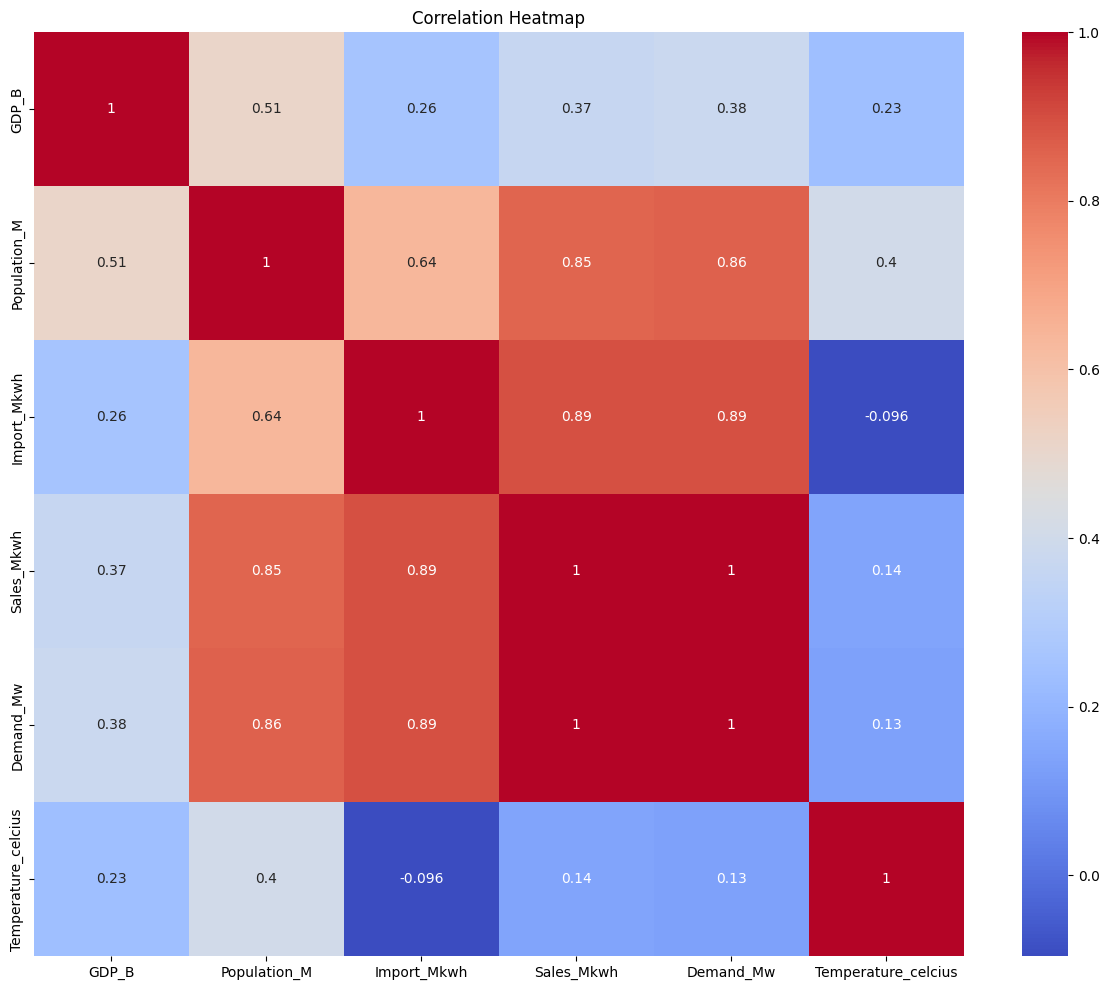

In [17]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = '/kaggle/input/tanjumdata/tanjum.xlsx' 
data = pd.read_excel(file_path)
# Filling missing values with the median for numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
data = data.iloc[:-2]

# Correct the date range if necessary
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)
correlation = data.corr()

# Create the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Save the figure
plt.savefig('correlation_heatmap.png')

# Show the plot
plt.show()

In [18]:
# Predict with LSTM (ensure X_test_lstm is appropriately shaped for LSTM input)
predictions_lstm = model_lstm.predict(X_test_lstm).flatten()  

# Predict with Linear Regression and Random Forest
predictions_lr = model_lr.predict(X_test)
predictions_rf = model_rf.predict(X_test)
# Ensure all prediction arrays have the same length
min_length = min(len(predictions_lr), len(predictions_rf), len(predictions_lstm))
predictions_lr = predictions_lr[:min_length]
predictions_rf = predictions_rf[:min_length]
predictions_lstm = predictions_lstm[:min_length]
y_test_aligned = y_test[:min_length]

# Calculate ensemble predictions
ensemble_predictions = (predictions_lr + predictions_rf + predictions_lstm) / 3
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

mae = mean_absolute_error(y_test_aligned, ensemble_predictions)
mse = mean_squared_error(y_test_aligned, ensemble_predictions)
rmse = sqrt(mse)
r2 = r2_score(y_test_aligned, ensemble_predictions)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [17]:
mae

2306.7204634128966

In [18]:
mse

5320959.296327809

In [19]:
rmse

2306.7204634128966

In [26]:
r2

0.6378624935489007